In [1]:
from os.path import join
import sys
if '../code_revised' not in sys.path:
    sys.path.insert(0, '../code_revised')

import matplotlib.pyplot as plt
import numpy as np
import tifffile as tf
from flyeye.data import Experiment
from figures.images import RatioImage
from figures.spatial import Correlation, Periodogram, R8Spacing

data_path = '../data/published/'

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Load Notch ts data

In [4]:
# instantiate Experiment objects
notch_control = Experiment(join(data_path, 'notch_ts', '18c'), normalization='ch2', recompile=True)
notch_perturbation = Experiment(join(data_path, 'notch_ts', '28c'), normalization='ch2', recompile=True)

# add P/Y ratio to cell data
notch_control.set_ratio('ch1_normalized', 'ch0_normalized')
notch_perturbation.set_ratio('ch1_normalized', 'ch0_normalized')

# manually align discs
notch_control.apply_lag(10.5)
notch_perturbation.apply_lag(8)
notch_perturbation.discs[2].apply_lag(1)

# Figure 5 A, B, and Fig 5 S1

In [2]:
bit_depth = 2**16
im_control_yan = tf.imread(join(data_path, 'notch_ts/microscopy/control/yan.tif')).astype(np.float64) / bit_depth
im_control_pnt = tf.imread(join(data_path, 'notch_ts/microscopy/control/pnt.tif')).astype(np.float64) / bit_depth
im_perturbation_yan = tf.imread(join(data_path, 'notch_ts/microscopy/perturbation/yan.tif')).astype(np.float64) / bit_depth
im_perturbation_pnt = tf.imread(join(data_path, 'notch_ts/microscopy/perturbation/pnt.tif')).astype(np.float64) / bit_depth

In [6]:
control = RatioImage(im_control_pnt, im_control_yan, 2.)
perturbation = RatioImage(im_perturbation_pnt, im_perturbation_yan)
#control.save('control', path='./graphics/images')
#perturbation.save('perturbation', path='./graphics/images')

# Figure 5 C, F

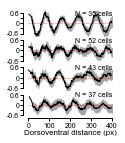

In [3]:
# Fig 5C (notch active)
fig5C = Correlation(notch_control)
fig5C.render(tmin=0, tmax=1.75)

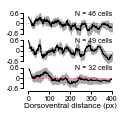

In [4]:
# Fig 5F (notch restricted)
fig5F = Correlation(notch_perturbation)
fig5F.render(tmin=0, tmax=1.75)

# Figure 5 D, G

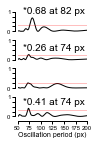

In [5]:
# Fig 5D (notch active)
fig5D = Periodogram(notch_control)
fig5D.render(tmin=0, tmax=1.75)

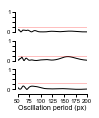

In [6]:
# Fig 5G (notch inactive)
fig5G = Periodogram(notch_perturbation)
fig5G.render(tmin=0, tmax=1.75)

# Figure 5 E

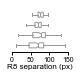

In [7]:
# Fig 5E
fig5E = R8Spacing(notch_control)
fig5E.render()